# Students stress level analysis

## importing libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

## Data collection

In [2]:
data=pd.read_csv(r"C:\Users\Administrator\Desktop\StressLevelDataset.csv")

In [3]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
data.shape

(1100, 21)

In [5]:
for i in data.columns:
    uv=data[i].nunique()
    print(f" The column {i} contain {uv} Unique values")

 The column anxiety_level contain 22 Unique values
 The column self_esteem contain 31 Unique values
 The column mental_health_history contain 2 Unique values
 The column depression contain 28 Unique values
 The column headache contain 6 Unique values
 The column blood_pressure contain 3 Unique values
 The column sleep_quality contain 6 Unique values
 The column breathing_problem contain 6 Unique values
 The column noise_level contain 6 Unique values
 The column living_conditions contain 6 Unique values
 The column safety contain 6 Unique values
 The column basic_needs contain 6 Unique values
 The column academic_performance contain 6 Unique values
 The column study_load contain 6 Unique values
 The column teacher_student_relationship contain 6 Unique values
 The column future_career_concerns contain 6 Unique values
 The column social_support contain 4 Unique values
 The column peer_pressure contain 6 Unique values
 The column extracurricular_activities contain 6 Unique values
 The colu

In [6]:
data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [7]:
data.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

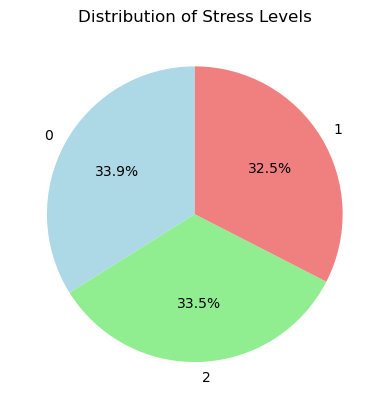

In [8]:
import matplotlib.pyplot as plt

data['stress_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Stress Levels')
plt.ylabel('')
plt.show()

In [9]:
x=data.drop("stress_level",axis=1)
y=data["stress_level"]

## train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=5)


In [11]:
print(y_train.shape)
y_test.shape

(990,)


(110,)

# gridsearchCV

In [12]:
model_params={"svm":{"model":SVC(gamma="auto"),"params":{"C":[1,5,10],"kernel":["rbf","Linear"]}},
             "random_forest":{"model":RandomForestClassifier(),"params":{"n_estimators":[1,5,10]}},
             "LogisticRegression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}}}

In [13]:
score = []
models = ["svm","random_forest","LogisticRegression"]

In [14]:
for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(x_train, y_train)
    score.append({"model": model_name, "best_score": gds.best_score_, "best_params": gds.best_params_})

In [15]:
pd.DataFrame(score)

,model,best_score,best_params
0,svm,0.879798,"{'C': 5, 'kernel': 'rbf'}"
1,random_forest,0.873737,{'n_estimators': 10}
2,LogisticRegression,0.881818,{'C': 10}


In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
model.score(x_train,y_train)

0.8909090909090909

In [18]:
model.score(x_test,y_test)

0.9454545454545454

In [19]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
model.score(x_train,y_train)

1.0

In [21]:
model.score(x_test,y_test)


0.9272727272727272

In [22]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2],
      dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
accuracy_score(y_test,y_pred) 

0.9272727272727272

In [25]:
cm=confusion_matrix(y_test,y_pred)        # table used in machine learning and statistics to assess the
                                      #performance of a classification model
cm

array([[31,  3,  0],
       [ 3, 31,  0],
       [ 1,  1, 40]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.89      0.91      0.90        34
           2       1.00      0.95      0.98        42

    accuracy                           0.93       110
   macro avg       0.92      0.93      0.92       110
weighted avg       0.93      0.93      0.93       110



# input and prediction

In [27]:
print('Find out your stress level by inputing your data')
print('--------------')
a=int(input('anxiety_level rating from 0-20:'))
b=int(input('self esteem rating from 0-30:'))
c=int(input('''mental health history
0:NO
1:Yes'''))
d=int(input('''depression rating from 0-30:'''))
e=int(input('''head ache rating from 0-3:'''))
f=int(input('''blood pressure rating from 0-3:'''))
g=int(input('''sleep quality rating from 0-5:'''))
h=int(input('''breathing problemrating from 0-5:'''))
i=int(input('''noise level rating from 0-5:'''))
j=int(input('''living condition rating from 0-5:'''))
k=int(input('''basic needs rating from 0-5:'''))
l=int(input('''safety rating from 0-5:'''))
m=int(input('''academic perfomance rating from 0-5:'''))
n=int(input('''teacher student relationship rating from 0-5:'''))
o=int(input('''study load rating from 0-5:'''))
p=int(input('''future career concerns rating from 0-5:'''))
q=int(input('''social support rating from 0-3:'''))
r=int(input('''peer pressure rating from 0-5:'''))
s=int(input('''axtracurricular activities rating from 0-5:'''))
t=int(input('''bullying rating from 0-5:'''))



Find out your stress level by inputing your data
--------------
anxiety_level rating from 0-20:0
self esteem rating from 0-30:15
mental health history
0:NO
1:Yes0
depression rating from 0-30:0
head ache rating from 0-3:0
blood pressure rating from 0-3:0
sleep quality rating from 0-5:5
breathing problemrating from 0-5:0
noise level rating from 0-5:0
living condition rating from 0-5:4
basic needs rating from 0-5:5
safety rating from 0-5:5
academic perfomance rating from 0-5:5
teacher student relationship rating from 0-5:5
study load rating from 0-5:5
future career concerns rating from 0-5:5
social support rating from 0-3:2
peer pressure rating from 0-5:3
axtracurricular activities rating from 0-5:5
bullying rating from 0-5:2


In [28]:
prediction_data=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]
prediction_data

[0, 15, 0, 0, 0, 0, 5, 0, 0, 4, 5, 5, 5, 5, 5, 5, 2, 3, 5, 2]

In [29]:
user=pd.DataFrame([prediction_data])
user

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,15,0,0,0,0,5,0,0,4,5,5,5,5,5,5,2,3,5,2


In [30]:
model.predict(user)

array([0], dtype=int64)

In [37]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2],
      dtype=int64)

In [38]:
pd.DataFrame({"actual value":y_test,"predicted value":y_pred})

,actual value,predicted value
469,2,2
851,1,1
11,2,2
788,1,1
604,0,0
...,...,...
86,1,1
1089,0,1
495,1,1
445,2,2


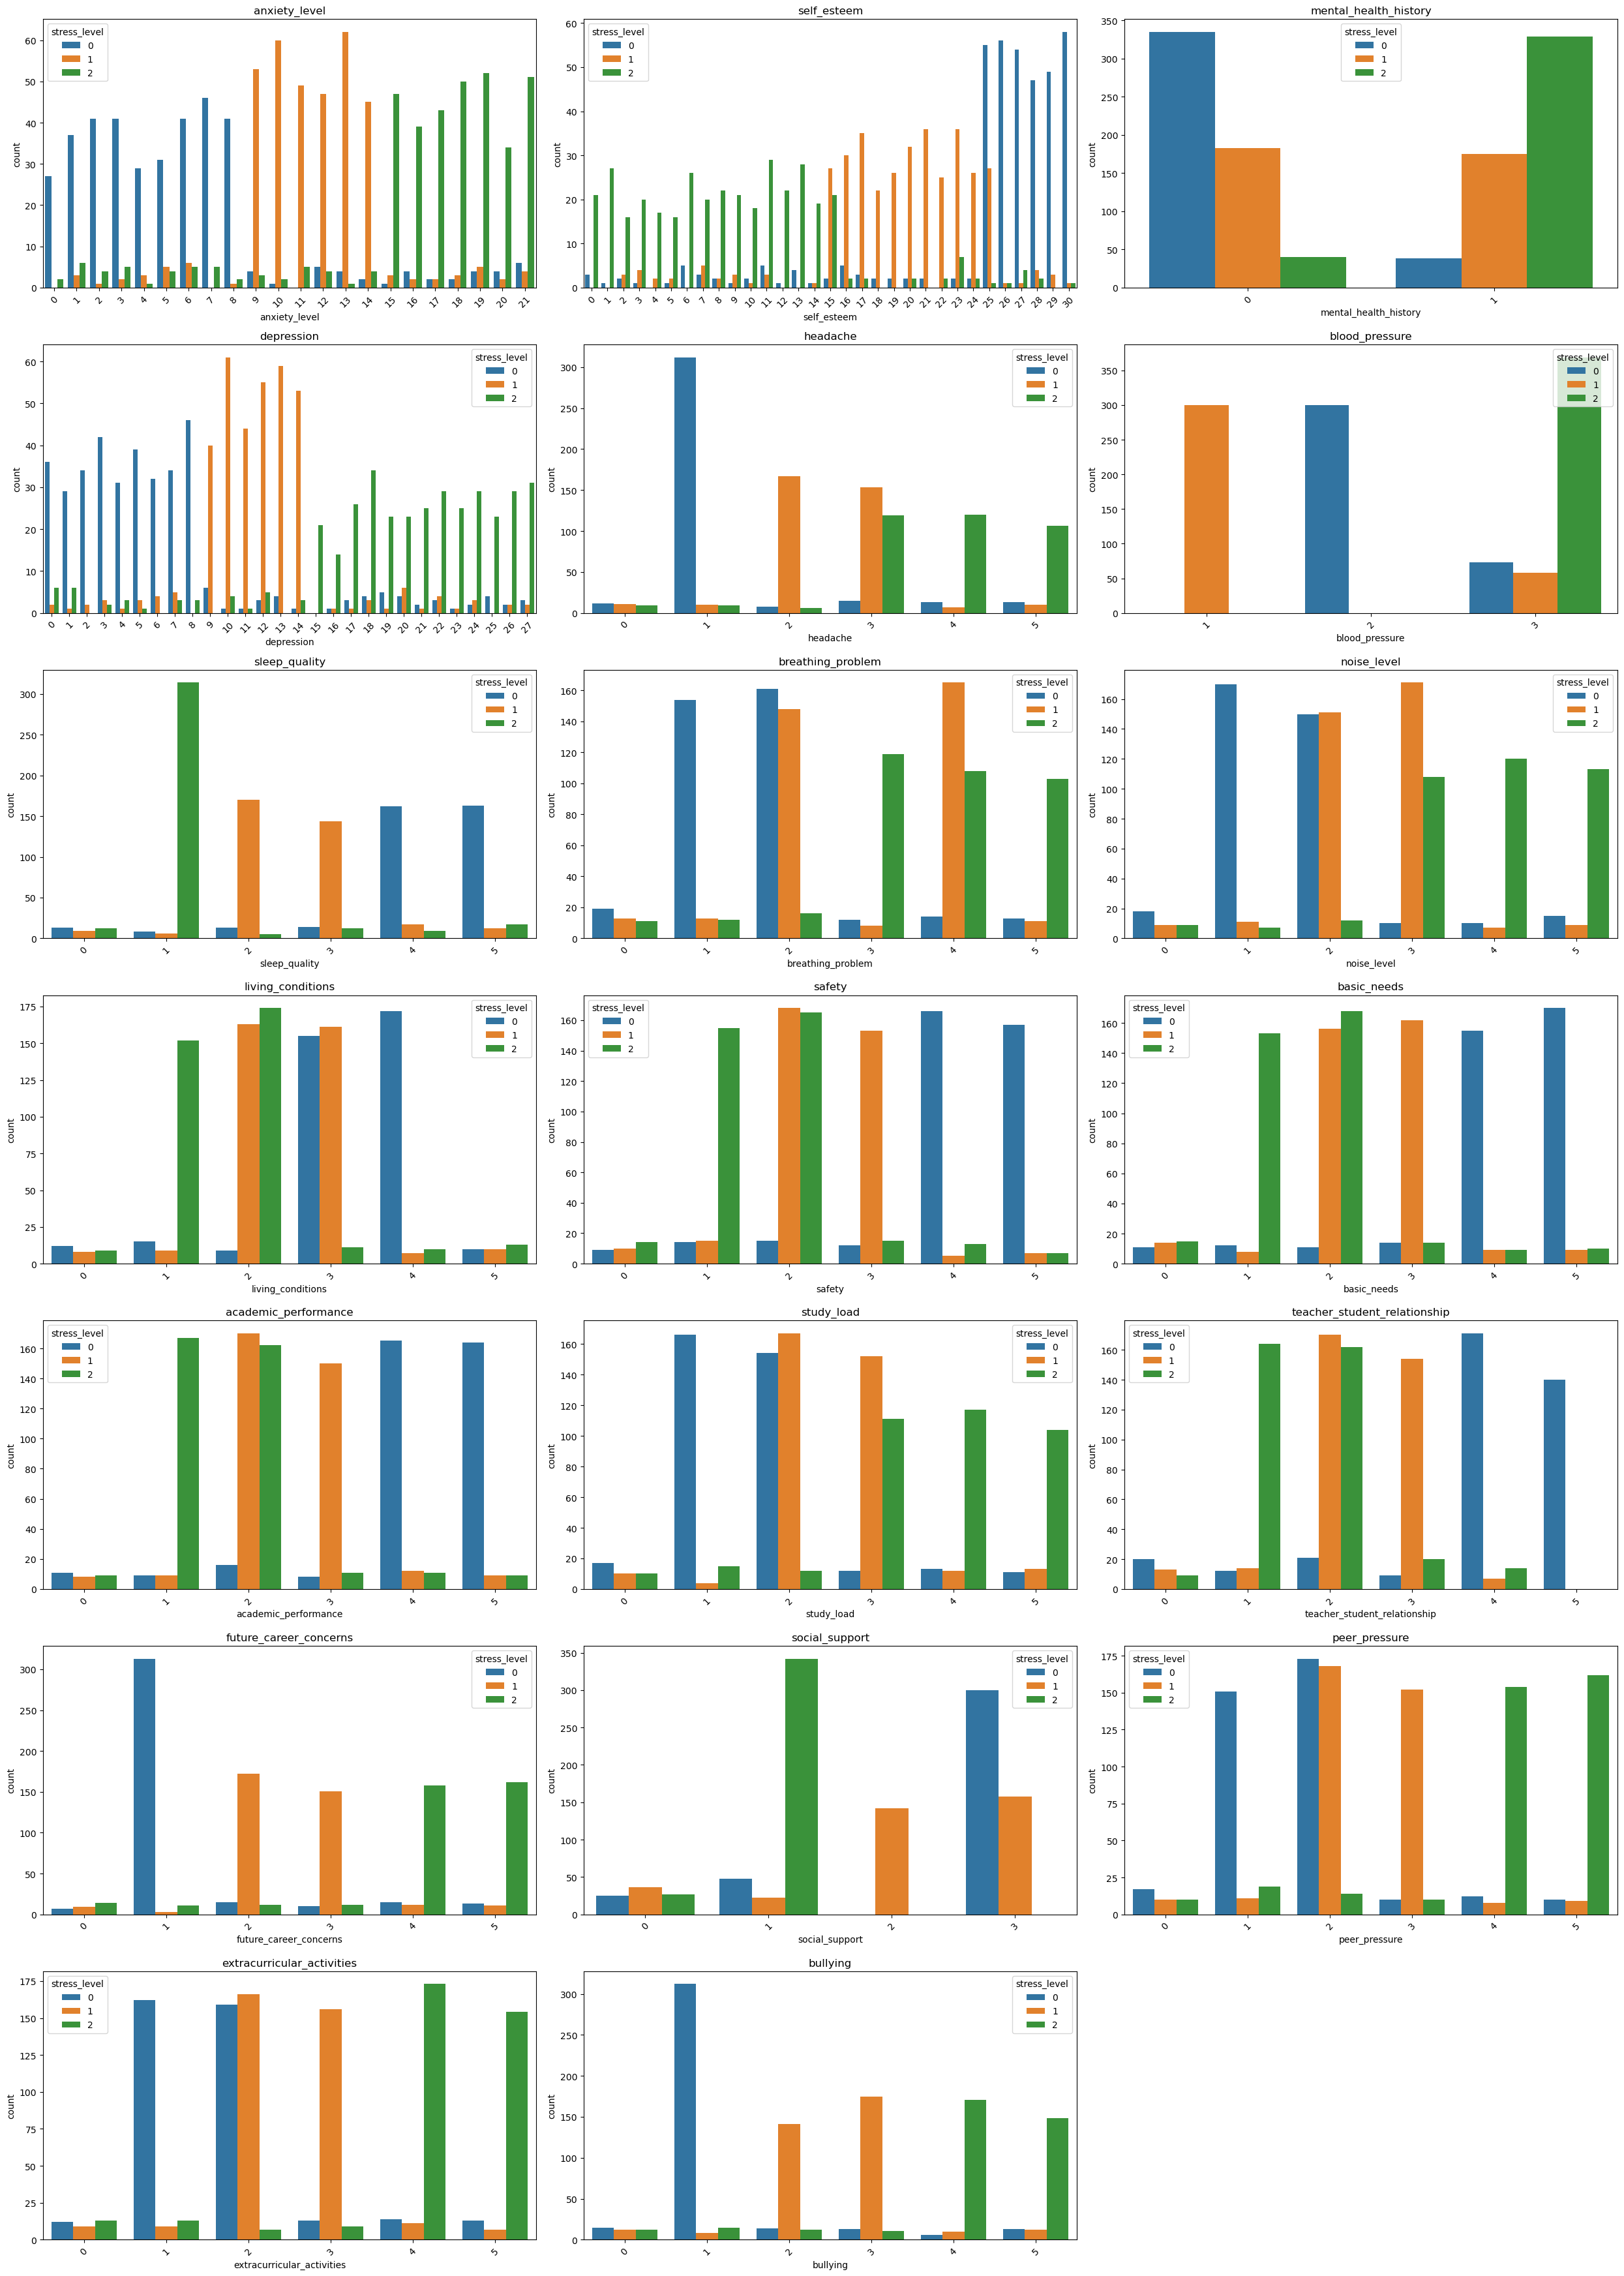

In [39]:
num_columns = len(data.columns[:-1])
num_rows = (num_columns + 2) // 3 

# Set the figure size
plt.figure(figsize=(25, num_rows * 5))  
for i, column in enumerate(data.columns[:-1]):  
    plt.subplot(num_rows, 3, i+1)  
    sns.countplot(x=column, hue='stress_level', data=data)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
log_score=cross_val_score(LogisticRegression(),x_train,y_train)
svm_score=cross_val_score(SVC(),x_train,y_train)
rf_score=cross_val_score(RandomForestClassifier(),x_train,y_train)

In [ ]:
import numpy as np
print(np.mean(log_score))
print(np.mean(svm_score))
print(np.mean(rf_score))